### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Create a function to display the image in a larger size

In [39]:
def display(img,cmap=None):
    plt.figure(figsize=(8,8))
    plt.imshow(img,cmap=cmap)

### Read 'coins_image.jpg' with cv2

In [40]:
img=cv2.imread('coins_image.jpg')

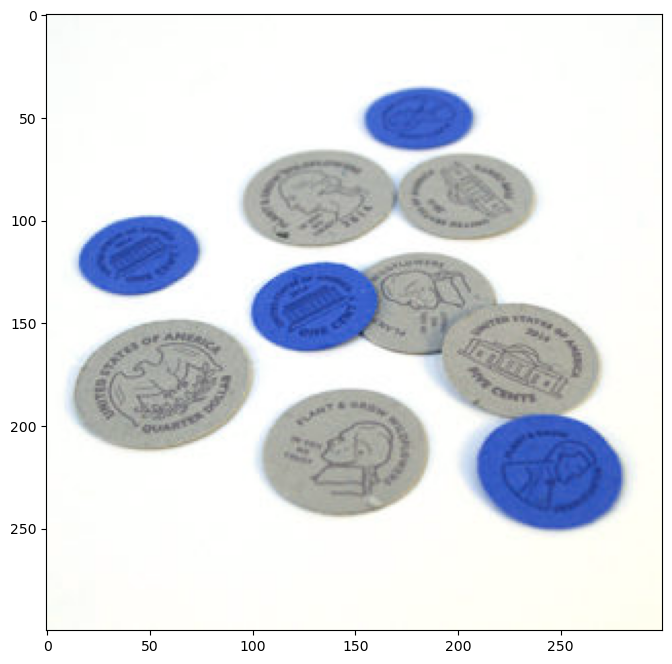

In [41]:
display(img)

### Apply Median Blur

In [42]:
coin_blur=cv2.medianBlur(img,15)

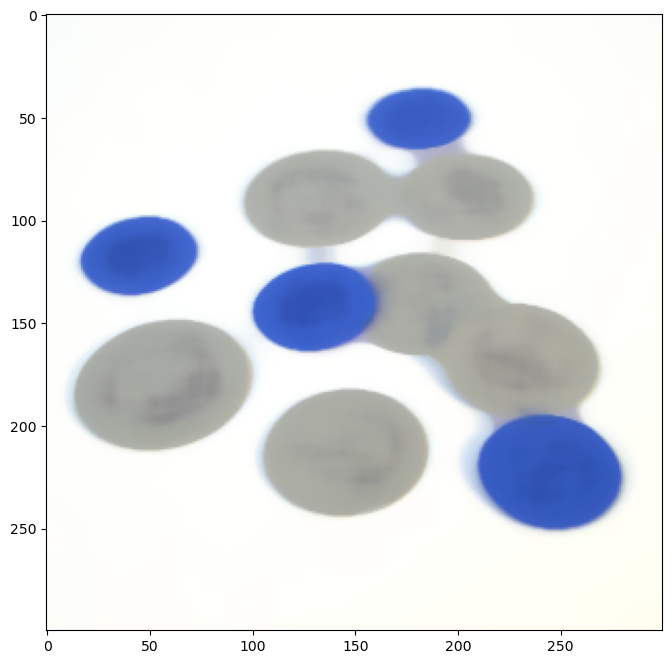

In [43]:
display(coin_blur)

### Convert to Grayscale

In [44]:
gray=cv2.cvtColor(coin_blur,cv2.COLOR_BGR2GRAY)

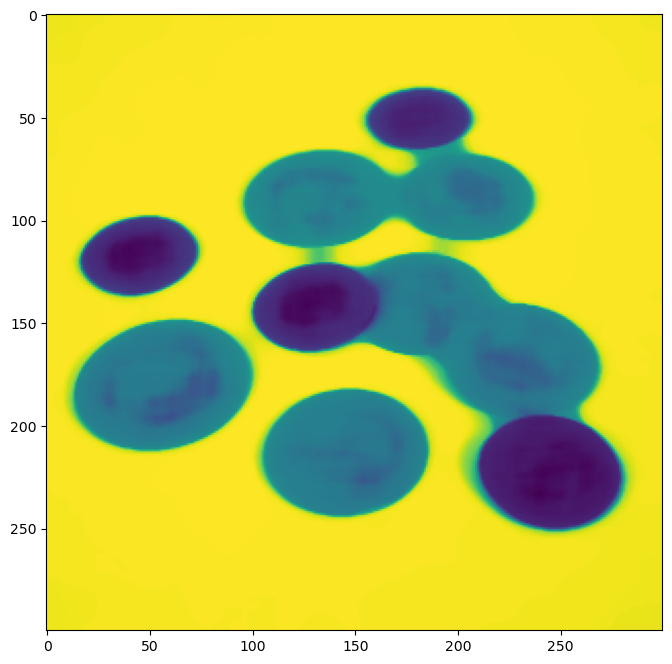

In [45]:
display(gray)

### Apply threshold (Inverse binary with OTSU)

In [46]:
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

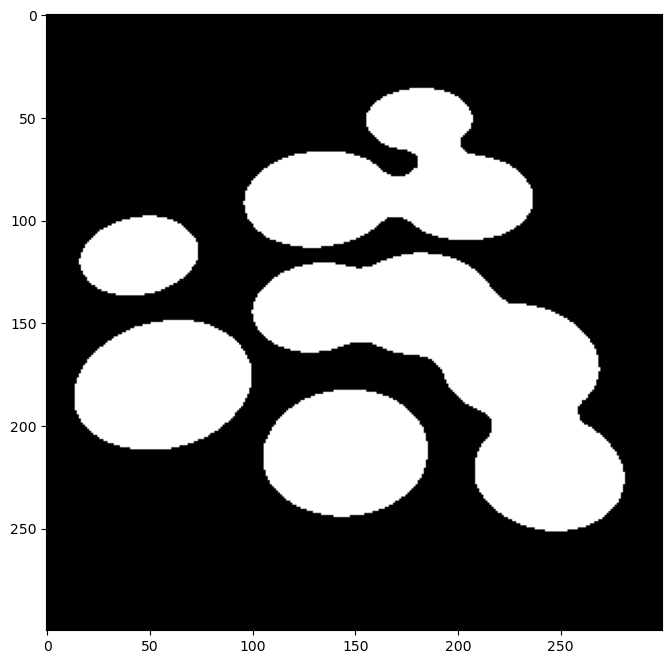

In [47]:
display(thresh, cmap ='gray')

### Remove noise with the help of a morphological operator

In [48]:
kernal=np.ones((3,3))
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernal,iterations=3)

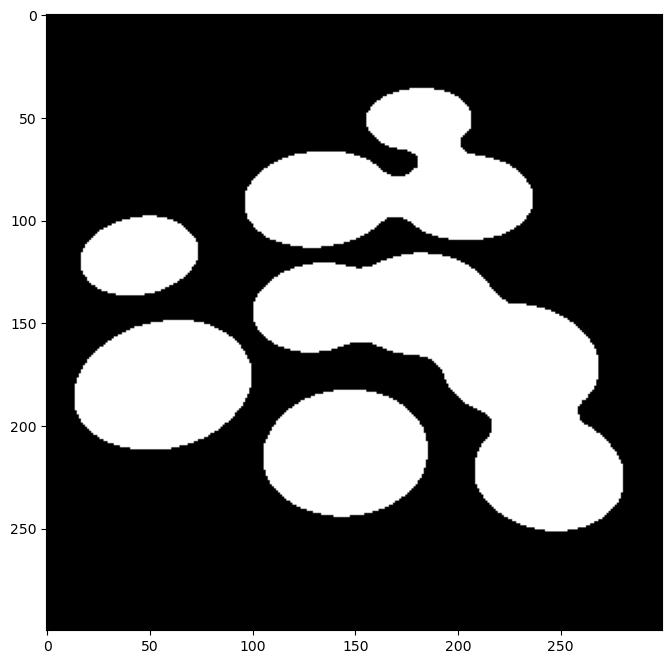

In [49]:
display(opening, cmap = 'gray')

### Grab background that you are sure of

In [50]:
sure_bg=cv2.dilate(opening,kernal,iterations=3)

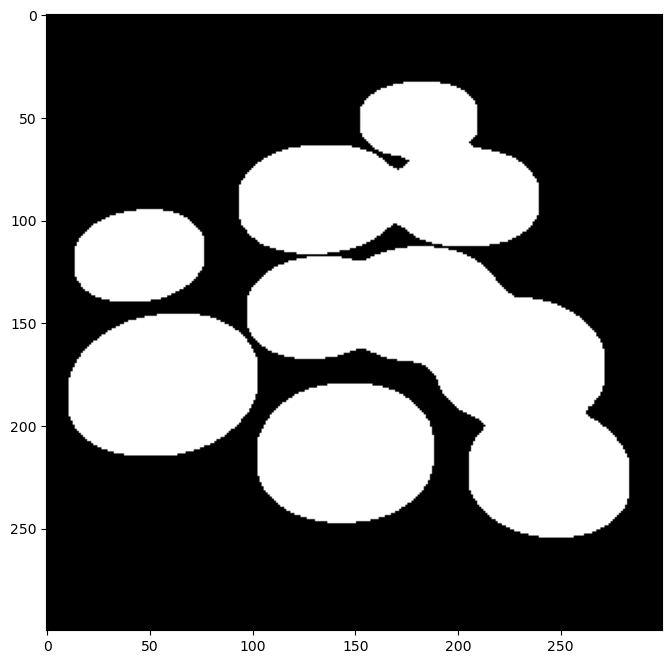

In [51]:
display(sure_bg, cmap = 'gray')

### Find sure Foreground

In [52]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)

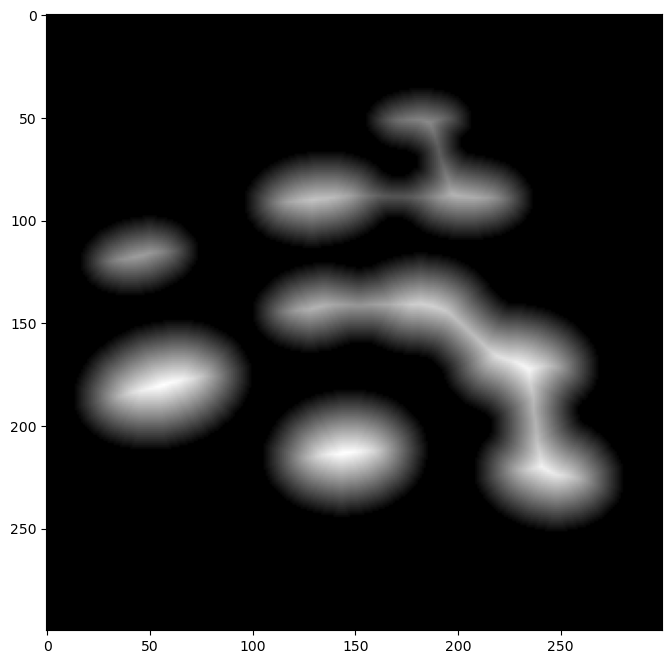

In [53]:
display(dist_transform, cmap = 'gray')

In [54]:
ret, sure_fg = cv2.threshold(dist_transform, 0.4*dist_transform.max(), 255, 0)

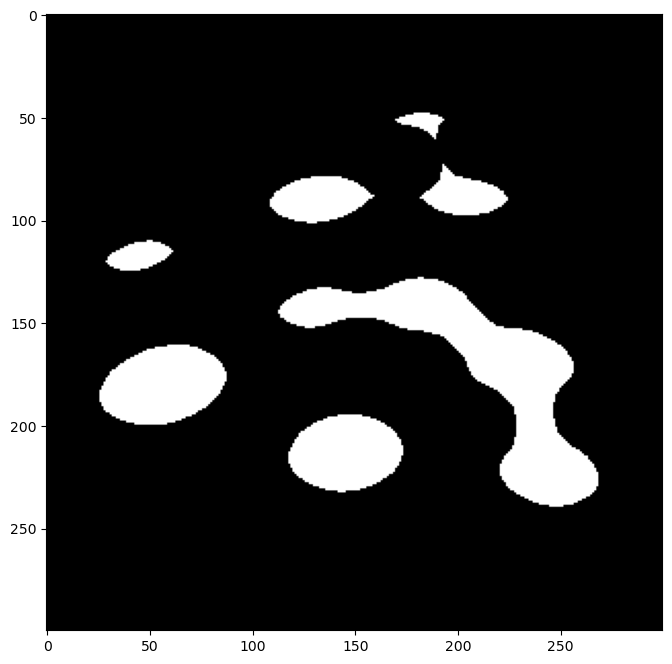

In [55]:
display(sure_fg, cmap = 'gray')

### Find unknown region

In [56]:
sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg,sure_fg)

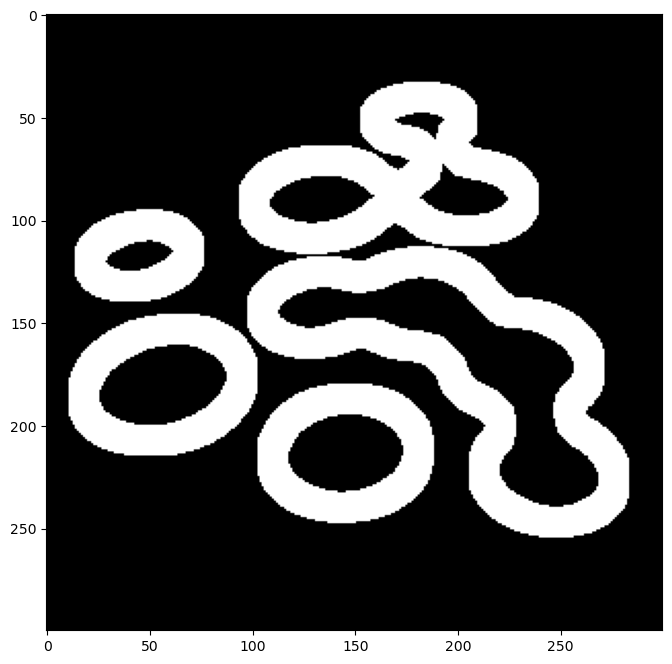

In [57]:
display(unknown, cmap = 'gray')

### Label Markers of sure Foreground

In [58]:
ret,markers=cv2.connectedComponents(sure_fg)
markers=markers+1
markers[unknown==255]=0

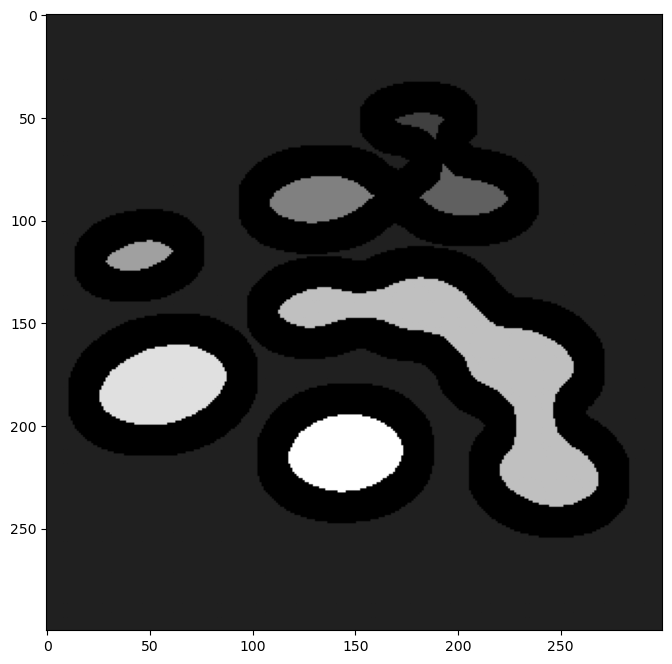

In [59]:
display(markers, cmap = 'gray')

### Apply watersheld alogirithm to find markers

In [60]:
markers = cv2.watershed(coin_blur, markers)

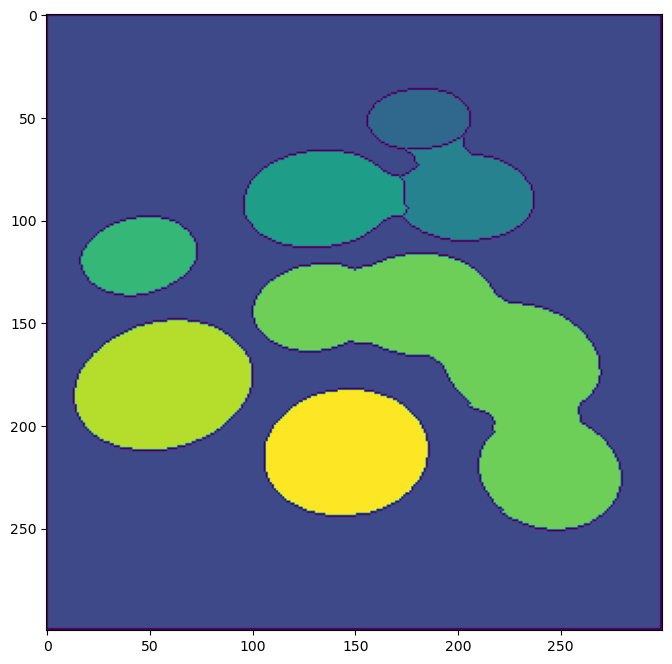

In [61]:
display(markers)

### Read the image again

In [62]:
coin_img=cv2.imread('coins_image.jpg')

### Find contours on Markers

In [63]:
contours,hierarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(coin_img,contours,i,(255,0,0),8)

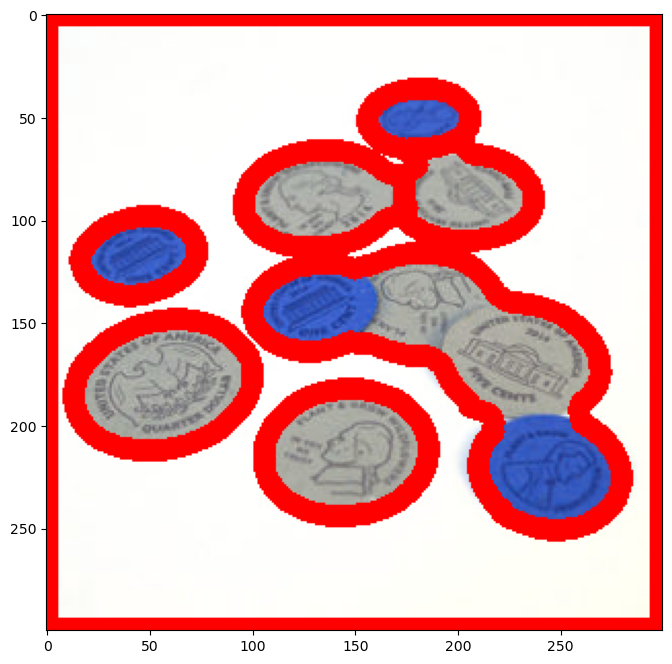

In [64]:
display(coin_img)

***